## Instructions
- See deadline on the course web page
- This problem set is solved individually. See examination rules on the course web page and the explanation of the examination procedure below.
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on. The extra problems are usually more challenging.
- Students are allowed to discuss together and help each other when solving the problems. However, every student must understand their submitted solution in the sense that they should be able to explain and discuss them with a peer or with a teacher.
- While discussions with your peers are allowed (and even encouraged), direct plagiarism is not. Every student must reach their own understanding of submitted solutions according to the definition in the previous point.
- The use of coding assistance from code generating artificial intelligence tools is allowed. However, every student must reach their own understanding of submitted solutions (including employed algorithms) according to the definition above.
- Some problems include checkpoints in the form of `assert` statements. These usually check some basic functionality and you should make sure that your code passes these statements without raising an `AssertionError`. 
- Do not use other python modules than the ones included in the `environment.yml` file in the course github repo. 

- **Important:** The grading of problem sets requires **all** of the following actions:
  1. Make sure to always complete **Task 0** in the header part of the notebook and that this part does not raise any `AssertionError`(s).
  1. **Complete** the corresponding questions in Yata for every task that you have completed. This usually involves copying and pasting some code from your solution notebook and passing the code tests. You need to have a green check mark on Yata to get the corresponding points.
  1. **Upload** your solution in the form of your edited version of this Jupyter notebook via the appropriate assignment module in Canvas (separate for basic and extra tasks). It is the code and results in your submitted notebook that is considered to be your hand-in solution.
  1. If selected, be **available for a discussion** of your solution with one of the teachers on the Monday afternoon exercise session directly following the problem set deadline. No extra preparation is needed for these discussions apart from familiarity with your own solution. A list of randomly selected students will be published on the course web page around Monday noon. During the afternoon session that same day, students will be called in the numbered order until the end of the list (or the end of the exercise session). You must inform the responsible teacher as soon as possible following the publication of the student list if you can not be physically present at the exercise session (in which case we will have the discussion on zoom). An oral examination (on all aspects of the course) will be arranged during the exam week for students that do not show up for their discussion slot, or that fail to demonstrate familiarity with their hand-in solutions.

- Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

- Make sure that the **run time is smaller than a few minutes**. If needed you might have to reduce some computational tasks; e.g. by decreasing the number of grid points or sampling steps. Please ask the supervisors if you are uncertain about the run time. 

- Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)

By changing the below boolean variable `student_self_assessment` to `True` you attest that:
- All handed in solutions were produced by yourself in the sense that you understand your solutions and should be able to explain and discuss them with a peer or with a teacher.


In [1]:
student_self_assessment = True

# 
# YOUR CODE HERE
# 

In [2]:
assert student_self_assessment == True, 'You must assert the individual solution statements.'

# Problem Set 1 (Basic problems)

**Learning from data [TIF285], Chalmers, Fall 2024**

Last revised: 14-Aug-2024 by Christian Forssen [christian.forssen@chalmers.se]

## Problem 1 (2 points)

### Installations
Perform the installations and preparations that are described in the Getting Started instructions. At the end you should have:

1. downloaded the current version of the course material from the github repository or from the course web page;
2. a running python installation that includes the modules listed in the environment.yml file (e.g. numpy, matplotlib, pandas, emcee, scikit-learn, ...);
3. been able to open and run the Jupyter Notebooks with the first week exercises.
Ask the computer lab supervisors for assistance if needed.

In [8]:
# Modules needed for tests and file system operations
import sys

import os

# Where to save the figures and data files
DATA_ID = "DataFiles/"
if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

# Make sure that you are running python with version >= 3.x
#
# Import the following python modules with
# the specified abreviations:
# ---
# numpy as np
# scipy as scipy
# scipy.stats as stats
# pandas as pd
# matplotlib.pyplot as plt
# sklearn as skl
# emcee as emcee


# 
# YOUR CODE HERE
import numpy as np
import scipy as scipy
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import emcee as emcee

In [7]:
pip install emcee


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
# TESTS TO CHECK YOUR CODE
# ---
assert sys.version_info.major>=3, \
    'You are running Python version'+\
    f'{sys.version_info.major}.{sys.version_info.minor}'

modules = [('numpy','np'), ('scipy', 'scipy'), \
           ('pandas', 'pd'), ('matplotlib.pyplot', 'plt'), \
           ('sklearn', 'skl'), ('emcee', 'emcee')]
for (_module, _module_abbrev) in modules:
    assert _module in sys.modules and _module_abbrev in dir(),\
        f'Module {_module} not loaded properly.'

### Random samples
In this course there are $N$ students and three problem sets.
The random selection of students for problem set discussions is performed by drawing $N$ samples of three random variables $(X_1, X_2, X_3)$. These are arranged in an array of shape (N,3) as follows 
$$
\left(
\begin{array}{ccc}
x_1(1) & x_2(1) & x_3(1) \\
x_1(2) & x_2(2) & x_3(2) \\
\vdots & \vdots & \vdots \\
x_1(N) & x_2(N) & x_3(N)
\end{array}
\right).
$$
The students with the lowest values of the respective random variable will then be invited for discussions with a teaching assistant. E.g., for problem set 1 there will be an ordered list of students $(k, l, m, \ldots)$, where $x_1(k) < x_1(l) < x_1(m) < \ldots$.

It is considered fair that all students have the same probability to draw at least one small number, but it should be less likely to draw two small numbers. This can be achieved by making the random variables dependent, more specifically by making the covariance negative (anticorrelated). Here we use a correlated, multivariate Gaussian
$$
(X_1, X_2, X_3) \sim \mathcal{N}\left( \boldsymbol{\mu}, \boldsymbol{\Sigma} \right),
$$
with mean and covariance
$$
\boldsymbol{\mu} = (0,0,0),\quad
\boldsymbol{\Sigma} = \left(
\begin{array}{ccc}
1 & -0.49 & -0.49 \\
-0.49 & 1 & -0.49 \\
-0.49 & -0.49 & 1
\end{array}
\right),
$$ 
which means that every univariate, marginal distribution will be a standard normal ($\mu=0, \sigma^2=1$).

Take a minute to consider the reason for making the random variables anticorrelated (it is instructive to visualize the multivariate distribution) and the fact that the correlation factor cannot be more negative than -0.5.

**Task (see also Yata):** Consider a class with 6 students. Use the method `multivariate_normal` from `scipy.stats` and generate an array of shape (6,3) with samples from the distribution defined in Problem 1. Print the result. 

*Important*: Use the `numpy.random.default_rng` method with the seed=2024 to initiate a random number generator instance. This instance should then be used as a `random_state` when generating the samples. See the example in the Statistics chapter of the lecture notes. 

In [15]:
mu=[0,0,0]
covar=[[1,-0.49,-0.49],[-0.49,1,-0.49],[-0.49,-0.49,1]]
seed=2024

rng=np.random.default_rng(seed)

distribution=stats.multivariate_normal(mean=mu, cov=covar)
classes=distribution.rvs(size=6,random_state=rng)
print(classes)

[[-1.11905087 -0.99811517  1.83627828]
 [ 0.9644436   0.71172124 -1.69262451]
 [-1.00628415 -0.15806807  0.72092462]
 [-0.68862424 -0.11831764  0.98607858]
 [ 1.10002479 -1.83724359  0.72523775]
 [-0.77318101  1.6280719  -0.74800233]]


**Task (see also Yata):** Create a `Pandas.DataFrame` with the sample array from the previous task. The columns should be labeled ['X1', 'X2', 'X3'] while the row indices should be ['Student 1', 'Student 2', 'Student 3', ...]. Print the DataFrame (in the notebook you can try the more fancy option `display`, while you should use `print` on Yata).

Assume that only the first two students from each ordered list are selected. Which student(s) will not be selected for any of the problem sets.

In [25]:
dataframe=pd.DataFrame(classes, columns=['X1','X2','X3'], index=['Student 1','Student 2','Student 3','Student 4','Student 5','Student 6'])
display(dataframe)


,X1,X2,X3
Student 1,-1.119051,-0.998115,1.836278
Student 2,0.964444,0.711721,-1.692625
Student 3,-1.006284,-0.158068,0.720925
Student 4,-0.688624,-0.118318,0.986079
Student 5,1.100025,-1.837244,0.725238
Student 6,-0.773181,1.628072,-0.748002


## Problem 2 (3 points)

**Non-linear minimization**

In this problem you should find the parameter $\theta$ that minimizes the function
$$
f(\theta) = \sin(6 \theta) + 0.2 \theta^2 - 0.7 \theta
$$
on the interval $\theta \in [-5,5]$.

The aim is to find the position of the minimum $\theta^*$ to within $\pm 0.05$ under the constraint that we would like to make as few function evaluations as possible.

### (a) Grid search

**Task (see also Yata)**
Plot the true function and indicate the position of the minimum
What is the position of the *global* minimum (with at least three significant digits)?

1.8316831683168315


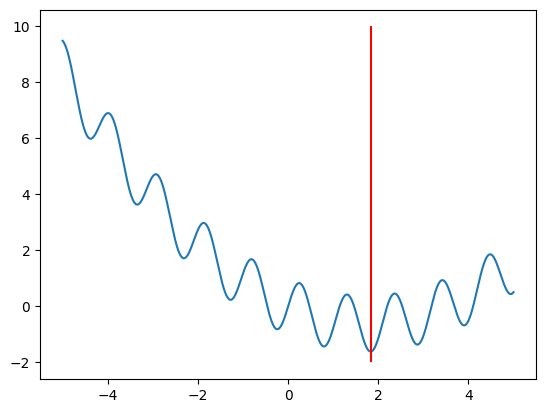

In [32]:
theta_min =  -5.
theta_max =  5.
theta=np.linspace(-5,5,num=10000)
def func(theta):
    return np.sin(6*theta)+0.2*theta**2-0.7*theta
min=theta[np.argmin(func(theta))]
print(min)
plt.plot(theta,func(theta))
plt.vlines(x=min,ymax=10,ymin=-2,color='red')
plt.show()

### (b) Find the minimum using `scipy.optimize.minimize` with `method='Nelder-Mead'`. 
* Choose the starting point randomly from a uniform pdf $U(-5,5)$. 
* Repeat one hundred times. **Do you always get the same minimum?**
* More specifically, set the tolerance of the optimizer to `tol=0.01` and check for success by the criterion $|\theta^* - \theta^*_\mathrm{opt}| < 0.05$, where $\theta^*_\mathrm{opt}$ is the result from the optimizer.
* Be quantitative about the average number of function evaluations that are needed per successful optimization. Compute the ratio of the total number of function evaluations number (summed over the 100 tries with different starting points) with the number of successful attempts.  
  *Hint*: The number of function evaluations from a `scipy.optimize.minimize` result is returned in the ``OptimizeResult`` object. 

### (c) Implement a gradient descent method to perform this minimization.

In [ ]:
# 
# YOUR CODE HERE
# 

## Problem 3 (3 points)

**Generate data**

In [ ]:
# Generate noisy data with a quadratic feature
# use the following code:
seed = 42
rng = np.random.default_rng(seed)

m = 100 # Number of data

# X are picked uniform random [0,2]
X = rng.uniform(low=0.0, high=2.0, size=(m, 1))
# Linear relation to the predicted value, but with Gaussian noise (mean=0, standard deviation=0.2)
theta_true = [0.25, 1, 0.75]
noise_std = 0.2
y = theta_true[2] * X**2 + theta_true[1] * X + theta_true[0] +  rng.normal(loc=0.0, scale=noise_std, size=(m,1))

# Below is a hidden code block that is used in the solution notebook to save the data. 
# 
# Please ignore the comment in this cell that says "YOUR CODE HERE". It gets added automatically.
# No solution code is needed here.
#
# 
# YOUR CODE HERE
# 

### (a) Linear regression using the Normal Equation

**Task (see also Yata):** Create a python function `design_matrix` that returns the design matrix for a polynomial model. 

In [ ]:
def design_matrix(X, degree=2):
    """
    Returns a design matrix.
    
    Args:
        X: Array of shape (m,1) with 'm' independent data.
        degree: Integer with the degree of the polynomial. 
                  Note that a degree-n polynomial has n+1 coefficients.
                  
    Returns:
        X_d: Design matrix of shape (m, order+1).
    """
    # 
    # YOUR CODE HERE
    # 

In [ ]:
# TESTS TO CHECK YOUR CODE
# ---
assert design_matrix(X).shape == (len(X),3)
assert design_matrix(X)[:,0].all() == 1
assert design_matrix(X)[0,1] == X[0]
assert design_matrix(X)[0,2] == X[0]**2

ratio = design_matrix(X)[:,2]/design_matrix(X)[:,1]**2
assert ratio.all() == 1

**Task (see also Yata):** Complete the python method `solve_normal_equation` that solves the normal equation using matrix inversion. This function can be used to fit a quadratic model to the data generated for this problem.  

In [ ]:
def solve_normal_equation(X_d, y):
    """
    Solve the normal equation.
    
    Args:
        X_d: Design matrix of shape (m,n) with 'm' independent data
               and 'n' features.
        y: Dependent data of shape (m,1).
                  
    Returns:
        theta_best: Best parameters, array of shape (n,).
    """
    # 
    # YOUR CODE HERE
    # 

In [ ]:
# TESTS TO CHECK YOUR CODE
# ---
assert (solve_normal_equation(design_matrix(X), y)).shape==(3,),\
    'Return object has wrong shape. Maybe the `flatten` method will be useful?'
theta_star = np.array([0.20661169, 1.10887503, 0.69743377])
theta_residuals = solve_normal_equation(design_matrix(X), y) - theta_star
assert (abs(theta_residuals)<1e-7).all(), f'The solution to the normal equation is of low precision. theta_residulas = {abs(theta_residuals)}'

### (b) Gradient descent
Gradient descent optimization is not really needed for linear regression since we can solve the normal equation exactly. However, it is instructive to implement it yourself and to be able to compare with a known solution.

**Task (see also Yata)** 
Define a function to compute the gradient for the linear regression cost function (as defined by a design matrix and the data; see further instructions in the code cell). Define then a function that performs gradient descent optimization.

In [ ]:
def gradient_linear_regression(X_d, y, theta):
    """
    Compute the gradient for the linear regression cost function at a specific parameter position.
    
    Args:
        X_d: Design matrix of shape (m,n) with 'm' independent data
               and 'n' features (ndarray).
        y: Dependent data of size m (ndarray).
        theta: List-like set of parameters (size n)
                  
    Returns:
        Gradient vector at position theta, array of shape (n,1).
    """
    (m,n) = X_d.shape
    assert len(y)==m, f'The size of y must be {m}. It is: {len(y)}.'
    y = y.reshape(-1,1) # Turn into a (m,1) array.
    assert len(theta)==n, f'The parameter vector must be of size {n}. It is: {len(theta)}.'
    
    # 
    # YOUR CODE HERE
    # 

In [ ]:
# TESTS TO CHECK YOUR CODE
# ---
assert (gradient_linear_regression(design_matrix(X), y, [0,0,0])).shape==(3,1),\
    'Return object has wrong shape.'
# Solution to normal equation
theta_star = np.array([0.20661169, 1.10887503, 0.69743377])
# Check gradient
gradient_optimum = gradient_linear_regression(design_matrix(X), y, theta_star)
assert (abs(gradient_optimum)<1e-7).all(), 'Gradient at optimum is not zero (elements > 10**-7)'


In [ ]:
def gradient_descent_linear_regression(X_d, y, theta_start, eta=0.1, n_iterations=1000):
    """
    Find optimized parameters in linear regression using (batch) gradient descent.
    
    Args:
        X_d: Design matrix of shape (m,n) with 'm' independent data
               and 'n' features (ndarray).
        y: Dependent data of size m (ndarray).
        theta_start: List-like initial guess for parameters (size n) 
        eta: learning rate (default 0.1) (float)
        n_iterations: Number of iterations (epochs) (default 1000) (integer)
                  
    Returns:
        theta_optimum: Optimized parameters, array of shape (n,).
    """
    (m,n) = X_d.shape
    assert len(y)==m, f'The size of y must be {m}. It is: {len(y)}.'
    y = y.reshape(-1,1) # Turn into a (m,1) array.
    assert len(theta_start)==n, f'The initial guess must be of size {n}. It is: {len(theta_start)}.'
    
    # 
    # YOUR CODE HERE
    # 

In [ ]:
# TESTS TO CHECK YOUR CODE
# ---
X_d = design_matrix(X)
assert (gradient_descent_linear_regression(X_d, y, [0,0,0], n_iterations=1)).shape==(3,),\
    'Return object has wrong shape. Maybe the `flatten` method will be useful?'
theta_star = np.array([0.20661169, 1.10887503, 0.69743377])
# Check gradient
gradient_optimum = theta_star - gradient_descent_linear_regression(X_d, y, theta_star,eta=1.0, n_iterations=1)
assert (abs(gradient_optimum)<1e-7).all(), 'Gradient at optimum is not zero (elements > 10**-7)'
# Check final optimum (tolerance 10**-2)
# Note that you might need to increase the number of iterations.
theta_residuals = gradient_descent_linear_regression(X_d, y, [0,0,0],n_iterations=2000) - theta_star
assert (abs(theta_residuals)<1e-2).all(), 'Residuals of GD optimum are too large (elements > 10**-2)'

### (c) Comparison of solvers

**Tasks (see also Yata)** 
Apply both your solver of the normal equation and your gradient descent optimizer to the same data and quadratic model that was introduced at the beginning of this problem.
- Print and compare the coefficients from (i) the true polynomial data generator to the linear regression fits to the (noisy) data from both (ii) the exact solution of the normal equation and (iii) the result of the gradient descent optimization. 
- Plot the data and the model predictions in the same figure.

In [ ]:
# 1. Print and compare the coefficients from 
#   (i) the true data generator, 
#   (ii) the solution of the normal equation, 
#   (iii) the optimum from gradient descent.
#
# 2. Plot the data, the true model and the fit model predictions in the same figure.

# 
# YOUR CODE HERE
# 

## Problem 4 (2 points)

### (a) Applying Bayesian rules of probability to a standard medical example

Suppose there is an unknown disease (call it UD) that does not give any symptoms in its early phase, but that there is a test for it.

a. The false positive rate is 2.3%. ("False positive" means the test says you have UD, but you don't.) <br>
b. The false negative rate is 1.4%. ("False negative" means you have UD, but the test says you don't.)

Assume that 1 in 10,000 people have the disease. You are given the test and get a positive result.  Your ultimate goal is to find the probability that you actually have the disease. 
$% Some LaTeX definitions we'll use.
\newcommand{\pr}{\textrm{p}}
$

We'll do it using the Bayesian rules.

We'll use the notation:

* $H$ = "you have UD"
* $\overline H$ = "you do not have UD"  
* $D$ = "you test positive for UD"
* $\overline D$ = "you test negative for UD"  

**Tasks (see also Yata)** 

Answer the following questions. Some of them are repeated on Yata.

a. *Before doing a calculation (or thinking too hard :), does your intuition tell you the probability you have the disease is high or low?*
<br>

b. *In the $p(\cdot | \cdot)$ notation, what is your ultimate goal?*
<br>

c. *Express the false positive rate in $p(\cdot | \cdot)$ notation.* \[Ask yourself first: what is to the left of the bar?\]
<br>

d. *Express the false negative rate in $p(\cdot | \cdot)$ notation. By applying the sum rule, what do you also know? (If you get stuck answering the question, do the next part first.)* 
<br>

e. *Should $p(D|H) + p(D|\overline H) = 1$?
    Should $p(D|H) + p(\overline D |H) = 1$?
    (Hint: does the sum rule apply on the left or right of the $|$?)*
<br>

f. *Apply Bayes' theorem to your result for your ultimate goal (don't put in numbers yet).
   What other probabilities do we need?*
<br>

In [ ]:
# This cell is used only in the solution notebook.
# 
# Please ignore the comment in this cell that says "YOUR CODE HERE". It gets added automatically.
# No solution code is needed here.
# ---
# 
# YOUR CODE HERE
# 


### (b) Applying Bayesian rules of probability to a standard medical example (cont.)

**Tasks (see also Yata)**

In [ ]:
# Please fill the probabilities as values for the 
# corresponding keys in the following dictionary.
medical_example_probabilities = {}
medical_example_probabilities['p(D|Hbar)'] = 0.0
medical_example_probabilities['p(Dbar|H)'] = 0.0
medical_example_probabilities['p(D|H)'] = 0.0
medical_example_probabilities['p(H,Hbar|D)'] = 0.0
medical_example_probabilities['p(Hbar)'] = 0.0
medical_example_probabilities['p(D)'] = 0.0
medical_example_probabilities['p(H|D)'] = 0.0

# 
# YOUR CODE HERE
# 

In [ ]:
for key in ['p(D|Hbar)', 'p(Dbar|H)', 'p(D|H)']:
    assert medical_example_probabilities[key] > 0.
    assert medical_example_probabilities[key] < 1.
    
assert medical_example_probabilities['p(H,Hbar|D)'] <= 1.0

In [ ]:
for key in ['p(Hbar)', 'p(D)', 'p(H|D)']:
    assert medical_example_probabilities[key] > 0.
    assert medical_example_probabilities[key] < 1.